In [29]:
import numpy as np
from sklearn import svm
import matplotlib as mpl
import matplotlib.colors
import matplotlib.pyplot as plt

In [30]:
def show_accuracy(a,b):
    acc=a.ravel()==b.ravel()
    print('accuracy:%.2f%%' % (100*float(acc.sum())/acc.size))

In [31]:
data = np.loadtxt(
    r'F:\study\ml\DoctorZou\14SVM_II\14.SVM(代码)\14.SVM\14.bipartition.txt',
    dtype=np.float,
    delimiter='\t')

In [32]:
x,y=np.split(data,(2,),axis=1)
y[y==0]=-1
y=y.ravel()


In [33]:
clfs = [
    svm.SVC(C=0.3, kernel='linear'),
    svm.SVC(C=10, kernel='linear'),
    svm.SVC(C=5, kernel='rbf', gamma=1),
    svm.SVC(C=5, kernel='rbf', gamma=4)
]
titles = 'Linear,C=0.3', 'Linear, C=10', 'RBF, gamma=1', 'RBF, gamma=4'

In [34]:
x1_min,x1_max=x[:,0].min(),x[:,0].max()
x2_min,x2_max=x[:,1].min(),x[:,1].max()
x1,x2=np.mgrid[x1_min:x1_max:500j,x2_min:x2_max:500j]
grid_test=np.stack((x1.flat,x2.flat),axis=1)

In [35]:
cm_light = matplotlib.colors.ListedColormap(['#77E0A0', '#FF8080'])
cm_dark = matplotlib.colors.ListedColormap(['g', 'r'])

In [36]:
x1.shape

(500, 500)

accuracy:73.00%
accuracy:73.00%
accuracy:71.00%
accuracy:75.00%


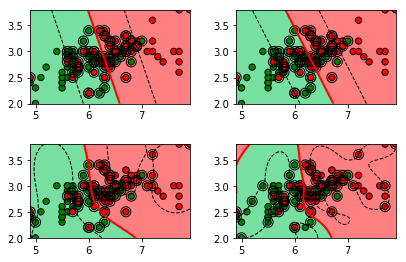

In [37]:
for i, clf in enumerate(clfs):
    clf.fit(x, y)
    y_hat = clf.predict(x)
    show_accuracy(y_hat, y)

    plt.subplot(2, 2, i + 1)
    grid_hat = clf.predict(grid_test)
    grid_hat = grid_hat.reshape(x1.shape)
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, edgecolors='k', s=40, cmap=cm_dark)
    plt.scatter(x[clf.support_, 0],
                x[clf.support_, 1],
                edgecolors='k',
                facecolors='none',
                s=100,
                marker='o')
    z = clf.decision_function(grid_test)
    z = z.reshape(x1.shape)
    plt.contour(x1,
                x2,
                z,
                colors=list('krk'),
                linestyles=['--', '-', '--'],
                linewidths=[1, 2, 1],
                levels=[-1, 0, 1])
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
plt.tight_layout(2)
plt.subplots_adjust(top=0.92)
plt.show()